In [1]:
import pandas as pd
import numpy as np
import os
import pathlib
import time
import json

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

sns.set_style('whitegrid')
np.random.seed(42)

In [3]:
pd. set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 0)

In [4]:
csv_path = "../../../../../../data/twint/"

In [5]:
from datetime import date, datetime, timedelta

def date_range(start_date, end_date):
    delta = end_date - start_date  # as timedelta
    days = [(start_date + timedelta(days=i)).strftime("%Y-%m-%d") for i in range(delta.days + 1)]
    return days # YYYY-MM-DD


In [6]:
# ticker = "AAPL,MSFT,AMZN,FB,GOOG,GOOGL,TSLA,NVDA,PYPL,ASML,INTC,CMCSA,NFLX,ADBE,CSCO,PEP,AVGO,TXN,TMUS"
ticker = "INTC"

In [7]:
p = pathlib.Path.cwd().glob(f"../../../../../../data/twint/{ticker}/*.csv")
files = [x for x in p if x.is_file()]

files.sort()  # sort the files by year

In [8]:
files

[PosixPath('/app/StockPricePredictions/src/exploratory_data_analysis/chance/python/samples/twint/../../../../../../data/twint/INTC/INTC_twint_2010.csv'),
 PosixPath('/app/StockPricePredictions/src/exploratory_data_analysis/chance/python/samples/twint/../../../../../../data/twint/INTC/INTC_twint_2011.csv'),
 PosixPath('/app/StockPricePredictions/src/exploratory_data_analysis/chance/python/samples/twint/../../../../../../data/twint/INTC/INTC_twint_2012.csv'),
 PosixPath('/app/StockPricePredictions/src/exploratory_data_analysis/chance/python/samples/twint/../../../../../../data/twint/INTC/INTC_twint_2013.csv'),
 PosixPath('/app/StockPricePredictions/src/exploratory_data_analysis/chance/python/samples/twint/../../../../../../data/twint/INTC/INTC_twint_2014.csv'),
 PosixPath('/app/StockPricePredictions/src/exploratory_data_analysis/chance/python/samples/twint/../../../../../../data/twint/INTC/INTC_twint_2015.csv'),
 PosixPath('/app/StockPricePredictions/src/exploratory_data_analysis/chance/

In [9]:
all_dfs = []

for f in files:

    _df = pd.read_csv(f, lineterminator='\n')

    all_dfs.append(_df)

    # start_date = date(int(f.stem), 1, 1)
    # end_date = date(int(f.stem), 12, 31)

    # if int(f.stem) == 2022:
    #     end_date = date(int(f.stem), 3, 4)

    # date_list = date_range(start_date, end_date)
    # print(start_date)
    
    # # Opening JSON file
    # with open(f) as json_file:
    #     data = json.load(json_file)
    #     for i in date_list:
    #         df_x = pd.DataFrame(data[i])
    #         df_x["date"] = datetime.strptime(i, "%Y-%m-%d")
    #         all_dfs.append(df_x)

In [10]:
df_combined = pd.concat(all_dfs)

In [11]:
df_combined.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,11759352927,11759352927,1.270651e+12,2010-04-07,0,NaN,How Intel Screwed Itself Out Of The iPad Revolution $INTC $AAPL by @stevecheney http://bit.ly/9TH2QJ,en,[],"['intc', 'aapl']",8841372,8841372,BITech,Business Insider Tech,3,14,https://twitter.com/BITech/status/11759352927,[],[],0,NaN,False,2,0,5,NaN,$INTC,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,14445920802,14445920802,1.274467e+12,2010-05-21,0,NaN,Google TV: Everything You Need To Know $GOOG $INTC by @jwyarow http://bit.ly/cpuhh8,en,[],"['goog', 'intc']",8841372,8841372,BITech,Business Insider Tech,5,18,https://twitter.com/BITech/status/14445920802,[],[],0,NaN,False,9,0,5,NaN,$INTC,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,20215013780,20215013780,1.280836e+12,2010-08-03,0,NaN,10 Things You Need To Know This Morning $AAPL $GOOG $INTC $AMZN $YHOO $RIMM by @jwyarow http://read.bi/8ZKtkZ,en,[],"['aapl', 'goog', 'intc', 'amzn', 'yhoo', 'rimm']",8841372,8841372,BITech,Business Insider Tech,2,11,https://twitter.com/BITech/status/20215013780,[],[],0,NaN,False,3,0,7,NaN,$INTC,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,20793963913,20793963913,1.281447e+12,2010-08-10,0,NaN,"$INTC is one of the most hated stocks i have ever seen-low valuation, great balance sheet and dividend...",en,[],['intc'],14216123,14216123,jimcramer,Jim Cramer,2,13,https://twitter.com/jimcramer/status/20793963913,[],[],0,NaN,False,1,0,6,NaN,$INTC,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,21583900261,21583900261,1.282230e+12,2010-08-19,0,NaN,Intel to Buy McAfee for $7.68 Billion to Add Software http://ow.ly/2rTEm $INTC $MFE,en,[],"['intc', 'mfe']",67358777,67358777,BW,Businessweek,4,15,https://twitter.com/BW/status/21583900261,[],[],0,NaN,False,1,0,5,NaN,$INTC,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [12]:
df_combined = df_combined.set_index("id")

In [13]:
df_combined.index.is_unique

True

In [14]:
df_combined.shape

(3498, 37)

In [15]:
df_aapl_groupedby_date = df_combined.groupby('date').count()
df_aapl_groupedby_date.reset_index(inplace=True)
df_aapl_groupedby_date.set_index("date", inplace=True)
df_aapl_groupedby_date = df_aapl_groupedby_date[["search"]]

In [16]:
df_aapl_groupedby_date.describe()

,search
count,1505.000000
mean,2.324252
std,2.656256
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,31.000000


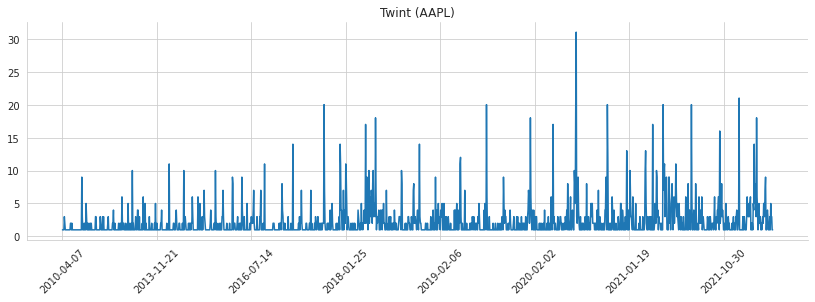

In [17]:
ax = df_aapl_groupedby_date["search"].plot(title='Twint (AAPL)',
           legend=False,
           figsize=(14, 4),
           rot=0)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
sns.despine()

In [21]:
# df_combined.to_csv(f"../../../../../../data/twint/{ticker}/{ticker}_20100101_to_20220304.csv")
# df_combined.shape
df = pd.read_csv(f"../../../../../../data/twint/{ticker}/{ticker}_20100101_to_20220304.csv", low_memory=False, index_col="id", lineterminator='\n')

In [22]:
df.shape

(3498, 37)

In [23]:
df.index.is_unique

True